MATH HERE

In [1]:
import numpy as np
from graspy.embed import AdjacencySpectralEmbed as ASE
from graspy.cluster import GaussianCluster as GCLUST
import matplotlib.pyplot as plt

from graspy.datasets import load_drosophila_left, load_drosophila_right
from graspy.utils import binarize

right_adj, right_labels = load_drosophila_right(return_labels=True)

%matplotlib inline

In [4]:
np.random.seed(16661)
A_right = binarize(right_adj)
X_hat = np.concatenate(ASE(n_components=3).fit_transform(A_right), axis=1)
n, d = X_hat.shape

gclust_right = GCLUST(max_components=15)
c_hat = gclust_right.fit_predict(X_hat)
unique_labels = np.unique(c_hat)
K = len(unique_labels)

In [5]:
import _pickle as pkl

class_idx = pkl.load(open('class_idx_dros_par.pkl', 'rb'))
combos = pkl.load(open('combos_dros_par.pkl', 'rb'))
aris = pkl.load(open('aris_dros_par.pkl', 'rb'))
bic = pkl.load(open('bic_dros_par.pkl', 'rb'))
loglikelihoods = pkl.load(open('loglikelihoods_dros_par.pkl', 'rb'))

Text(0.5, 1.0, 'Clustering with best ARI')

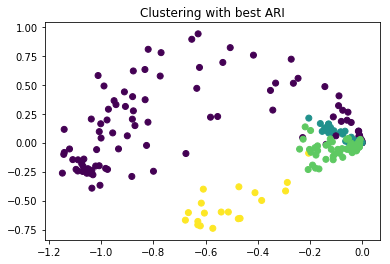

In [6]:
combo = combos[np.argmax(aris)]
temp_quad_labels = np.concatenate(class_idx[combo])
temp_label = min(combo)
temp_n = len(temp_quad_labels)

temp_c_hat = c_hat.copy()
temp_c_hat[temp_quad_labels] = temp_label

fig, ax = plt.subplots(1,1)
ax.scatter(-X_hat[:, 0], X_hat[:, 1], c=temp_c_hat)
ax.set_title('Clustering with best ARI')

Text(0.5, 1.0, 'Original clustering')

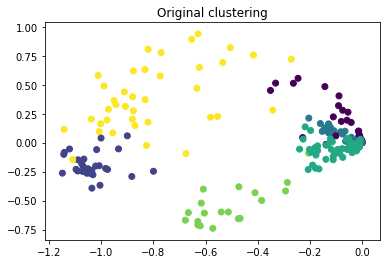

In [7]:
fig, ax = plt.subplots(1,1)
ax.scatter(-X_hat[:, 0], X_hat[:, 1], c=c_hat)
ax.set_title('Original clustering')

combo = combos[np.argmax(bic)]
temp_quad_labels = np.concatenate(class_idx[combo])
temp_label = min(combo)
temp_n = len(temp_quad_labels)

temp_c_hat = c_hat.copy()
temp_c_hat[temp_quad_labels] = temp_label

# params, pcov = optimize.curve_fit(func, X_hat[temp_quad_labels, :2], X_hat[temp_quad_labels, 2])

fig, ax = plt.subplots(1,1)
ax.scatter(-X_hat[:, 0], X_hat[:, 1], c=temp_c_hat)
ax.set_title('Clustering with best BIC')

fig, ax = plt.subplots(1,1)
ax.plot(np.arange(2**K), loglikelihoods)
ax.set_title("log likelihoods")
ax.axvline(x=np.argmax(bic), c ='g', alpha=0.5, label='argmax(bic)')
ax.axvline(x=np.argmax(aris), c ='r', alpha=0.5, label='argmax(ari)')
ax.axvline(x=0, c='k', alpha=0.5, label="gmm")
ax.legend()
# plt.savefig('log_likelihoods_dros_par.png')

fig, ax = plt.subplots(1,1)
ax.plot(np.arange(2**K), bic)
ax.axvline(x=np.argmax(aris), c='r', alpha=0.5, label = 'argmax(ari)')
ax.axvline(x=0, c='k', alpha=0.5, label="gmm")
ax.set_title('bic')
ax.legend()
# plt.savefig('bic_dros_par.png')

fig, ax = plt.subplots(1,1)
ax.plot(np.arange(2**K), aris)
ax.axvline(x=np.argmax(bic), c = 'g', alpha=0.5, label="argmax(bic)")
ax.axvline(x=0, c='k', alpha=0.5, label="gmm")
ax.set_title('ari')
ax.legend()
plt.savefig('ari_dros_par.png')

bic_ari = aris[np.argmax(bic)]
print("The clustering with the highest BIC has an ARI of {}, whereas GMM results in an ARI of {}".format(bic_ari, aris[0]))